# Multiple Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df=pd.read_csv('final_economic_index.csv')

In [7]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [16]:
# Drop unneccessary columns
df.drop(columns=['year', 'month'], axis=1, inplace=True)

In [17]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


In [23]:
## Check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

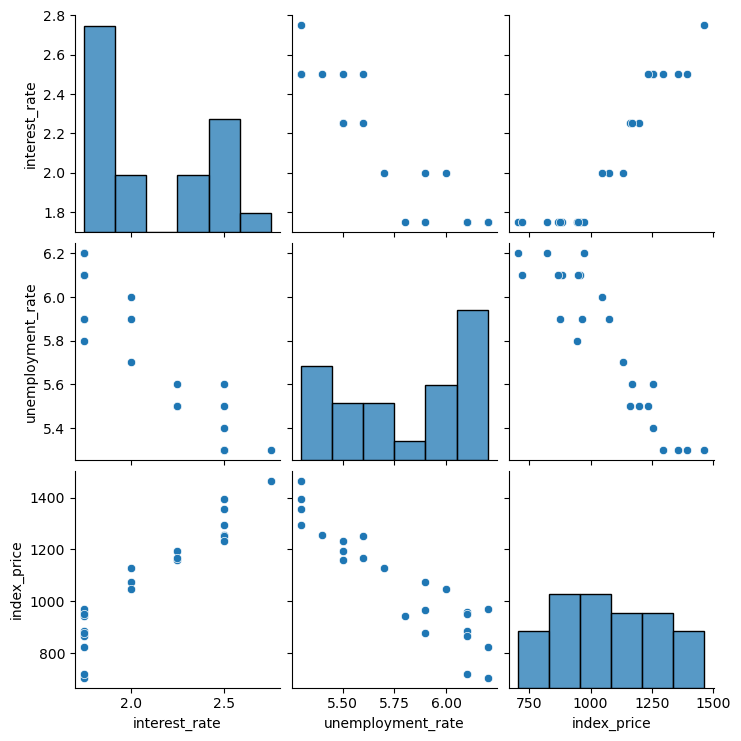

In [24]:
## Lets do some visualization
import seaborn as sns

sns.pairplot(df)

In [25]:
## Correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


1. Interest rate has a positive correlation with Index price. This means that if interest rate increases, then index price will also increase.
2. Unemployment rate has negative correlation with Index price. This means that if unemployment rate decreases, then index price will also decrease.

Text(0, 0.5, 'Unemployment Rate')

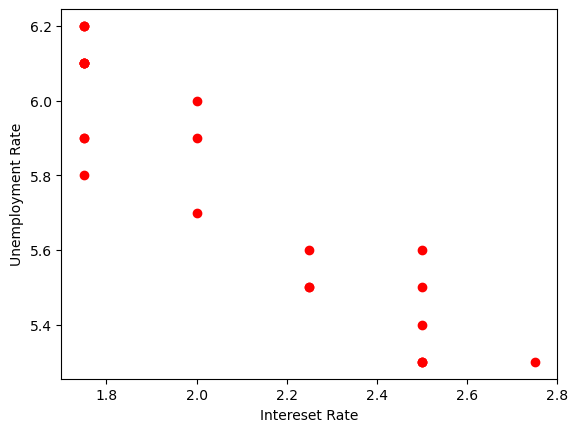

In [27]:
## Visualize the datapoints more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='red')
plt.xlabel('Intereset Rate')
plt.ylabel('Unemployment Rate')

In [51]:
## Independent and dependent features
X=df[['interest_rate', 'unemployment_rate']]
y=df['index_price']

In [54]:
# Train, Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=4)

In [34]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

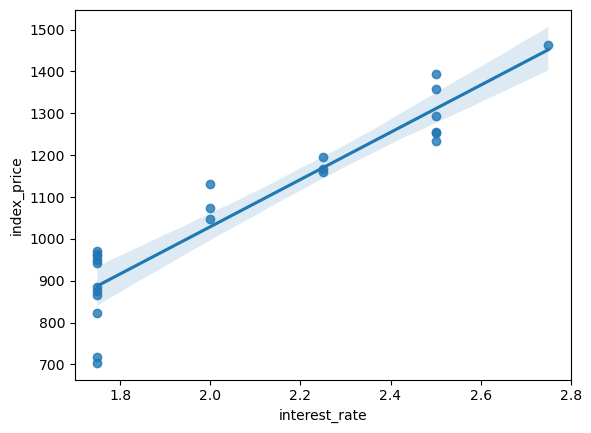

In [39]:
sns.regplot(data=df, x='interest_rate',y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

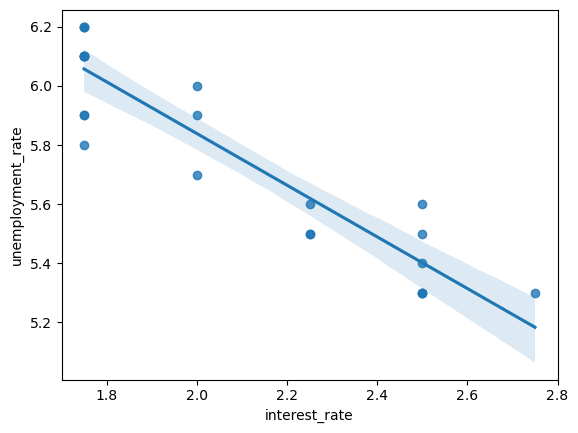

In [40]:
sns.regplot(data=df, x='interest_rate',y='unemployment_rate')

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

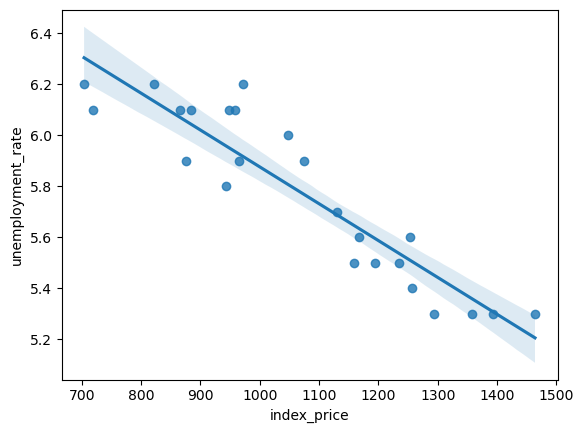

In [41]:
sns.regplot(data=df, x='index_price',y='unemployment_rate')

In [42]:
## Standarization
from sklearn.preprocessing import StandardScaler 

In [55]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
regression=LinearRegression()

In [60]:
regression.fit(X_train,y_train)

LinearRegression()

## Cross Val Score

In [65]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [69]:
np.mean(validation_score)

-4247.990295112816

In [75]:
## Prediction
y_pred_test=regression.predict(X_test)

In [76]:
y_pred_test

array([ 885.3157904 ,  885.3157904 , 1343.22752323, 1259.60404942,
        996.36545034, 1037.50472954])

In [73]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print("MSE = ", mse)
print("MAE = ", mae)
print("RMSE = ", rmse)

MSE =  10617.46974975377
MAE =  90.32163804399498
RMSE =  103.04110708719007


In [78]:
# R Square
from sklearn.metrics import r2_score

In [79]:
score = r2_score(y_test,y_pred_test)
print(score)

0.8424268750314811


In [80]:
# Adjusted R Square
adjusted_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_score)

0.7373781250524685


## Assumptions

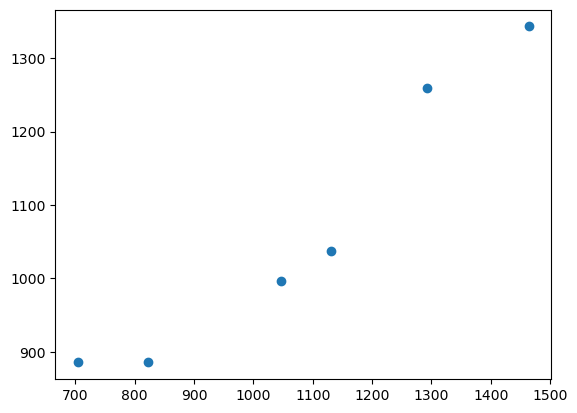

In [84]:
plt.scatter(y_test, y_pred_test)

In [85]:
residuals=y_test-y_pred
print(residuals)

22   -181.315790
21    -63.315790
0     120.772477
3      33.395951
12     50.634550
10     92.495270
Name: index_price, dtype: float64


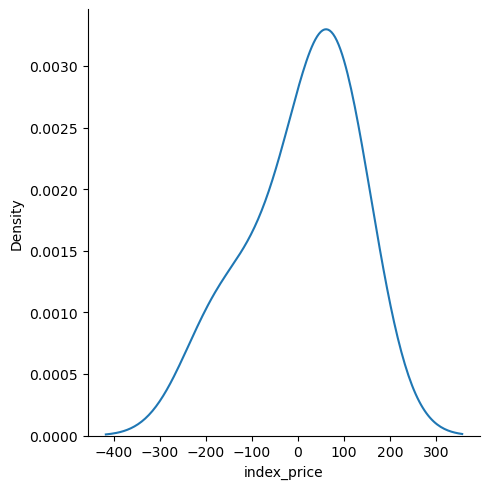

In [86]:
## Plot this residuals
sns.displot(residuals, kind='kde')

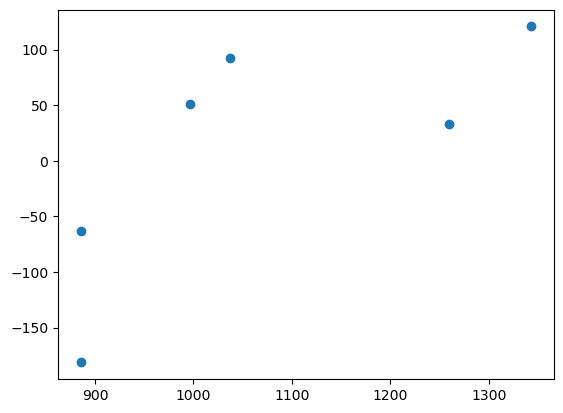

In [87]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [88]:
## OLS Linear Regression
import statsmodels.api as sm

In [89]:
model_ols=sm.OLS(y_train,X_train).fit()

In [91]:
prediction=model_ols.predict(X_test)
print(prediction)

[-182.57309849 -182.57309849  275.33863434  191.71516053  -71.52343855
  -30.38415935]


In [92]:
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):             -0.096
Method:                 Least Squares   F-statistic:                             0.2136
Date:                Sun, 04 Aug 2024   Prob (F-statistic):                       0.810
Time:                        19:56:24   Log-Likelihood:                         -151.09
No. Observations:                  18   AIC:                                      306.2
Df Residuals:                      16   BIC:                                      308.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [93]:
## Slope for each feature
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or slope:  [125.43521071 -52.16786156]
Intercept:  1067.888888888889
